<img src='https://github.com/Rogerio-mack/work/blob/main/figuras/logo_sbc.png?raw=true' width=250, align="right">

In [ ]:
import pandas as pd
import requests
import json
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# **Case: Dengue Porto Alegre**

Aqui vamos aproximar a série de dados de casos de dengue empregando 2 algoritmos de aprendizado de máquina. Apesar da boa aproximação, é importante você entender as limitações desse procedimento.

In [ ]:
# 4314902 = Porto Alegre city geocode
url = 'https://info.dengue.mat.br/api/alertcity'
search_filter = (
    'geocode=4314902&disease=dengue&format=csv&' +
    'ew_start=1&ew_end=50&ey_start=2010&ey_end=2024'
)
df = pd.read_csv('%s?%s' % (url, search_filter))
print(url)
print()

df.index = pd.to_datetime(df['data_iniSE'])
display(df.head())

print()
print(df.shape)
print(df.index.min(), df.index.max())

df.to_csv('dengue_porto_alegre.csv',index=None) # save, para empregarmos no caso de indisponibilidade da api


https://info.dengue.mat.br/api/alertcity



,data_iniSE,SE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,Localidade_id,nivel,...,umidmed,umidmin,tempmed,tempmax,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf,notif_accum_year
data_iniSE,,,,,,,,,,,,,,,,,,,,,
2024-05-05,2024-05-05,202419,44.0,7,198,0,4.038185e-03,3.133303,0,4,...,92.688635,90.893977,19.653846,19.923077,NaN,NaN,NaN,NaN,NaN,26924
2024-04-28,2024-04-28,202418,62.0,33,167,25,3.903330e-04,4.415109,0,4,...,94.080013,92.358410,19.428571,19.571429,NaN,NaN,NaN,NaN,NaN,26924
2024-04-21,2024-04-21,202417,59.0,32,142,24,1.454652e-09,4.201474,0,4,...,91.000454,89.518025,18.678571,19.071429,NaN,NaN,NaN,NaN,NaN,26924
2024-04-14,2024-04-14,202416,87.0,63,144,54,3.979120e-04,6.195394,0,4,...,90.445290,88.561908,20.051282,20.384615,NaN,NaN,NaN,NaN,NaN,26924
2024-04-07,2024-04-07,202415,177.0,153,239,147,9.999999e-01,12.604423,0,4,...,88.940192,87.779736,20.571429,20.714286,NaN,NaN,NaN,NaN,NaN,26924



(749, 30)
2010-01-03 00:00:00 2024-05-05 00:00:00


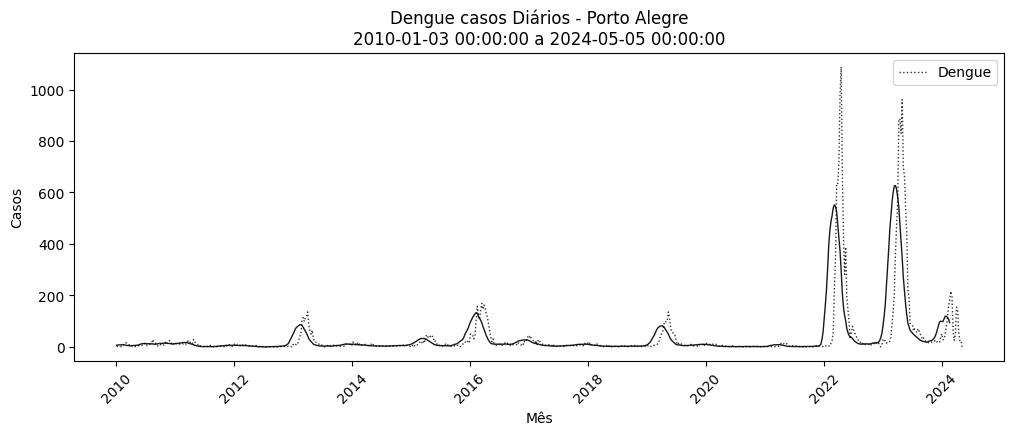

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 4))

ax1.plot(df.casos, label='Dengue', color='k', alpha=.8, linestyle=':', lw=1)
ax1.plot(df.casos.rolling(12).mean(), color='k', alpha=.9, lw=1)

plt.xlabel('Mês')
plt.ylabel('Casos')
plt.title('Dengue casos Diários - Porto Alegre\n' + str(df.index.min()) + ' a ' + str(df.index.max()))
plt.xticks(rotation=45)
ax1.legend()

plt.show()


# Ex1.

Separe somente os dados que serão empregados aqui. Empregaremos os `casos` e  `tempmed` como uma variável exógena para ajudar-nos na previsão. Vamos também empregar somente dados a partir de 2021 (por quê?). Exiba em um gráfico os dados obtidos em conjunto com a média dos valores ao longo de 30 dias (`rolling(30)`).

In [ ]:
# seu código

# Ex2.

Você deve ter observado vários valores ausentes. Preencha esses valores empregando a função `interpolate()` (pacote `pandas`) e exiba novamente os valores.

In [ ]:
# seu código

# Ex3.

Prepare os dados para o aprendizado de máquina da série temporal.

1. Verifique os torne os dados da série ordenados por data
2. Empregue lag 1 a 4 para os casos (nr de casos dos dias -1, -2, -3 e -4 como preditores) e lag 1 para temperatura (por que?)

Experimente diferentes regressores e faça a predição para os 30% dias finais da série e compare com a série original.

In [ ]:
# seu código

# Ex4.

Calcule as métricas de erro e compare os vários classificadores. Qual apresenta melhor resultado?

In [ ]:
# seu código